# EDA with Python and applying Logistic Regression
For this lecture we will be working with the Titanic Dataset from Kaggle. This is very famous dataset and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in pythonfor classification.

We'll use a "semi-cleaned" version of the Titanic data set. If you use the dataset hosted directly on kaggle.
You may need to do some additional cleaning.

# Import Libraries 
Let's import some libraries to get started

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The data
Let's start by reading in the titanic train.csv file into a pandas dataframe.

In [60]:
train=pd.read_csv('titanic-dataset.csv')

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis
Starting with same exploratory data analysis.

# Missing Data 
We can use seaborn to create a simple heatmap to see where we are missing data!

In [62]:
# Start checking with the null values.
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

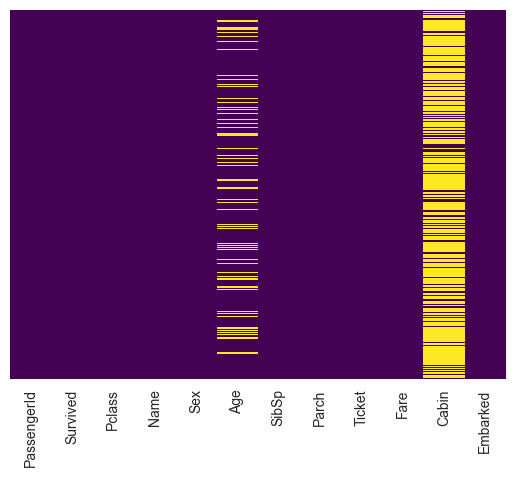

In [63]:
# Seeing the null values through visualization.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the age data is missing . The proportion af age missing is likely small enough for reasonable replacement with some form of imputation. Looking ath the cabin column. It look like we are just missing too much of that data to do something useful with at a basic level. We will probably drop this later, or change it to another feature like "Column known:1 or 0".

Let's continue on by visualizing some more of the data! 

<Axes: xlabel='Survived', ylabel='count'>

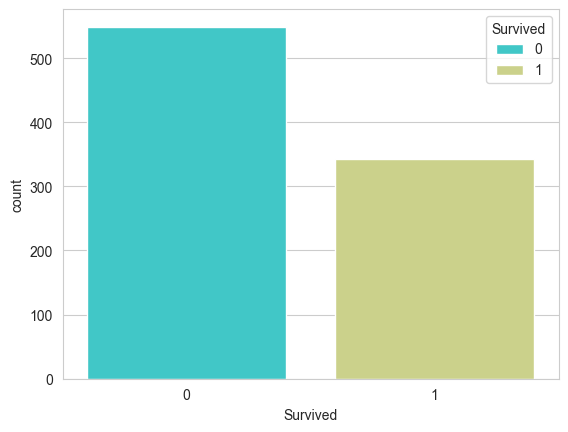

In [64]:
# Checcking how many people survived and how many people died with the help of visualization.
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='rainbow',hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

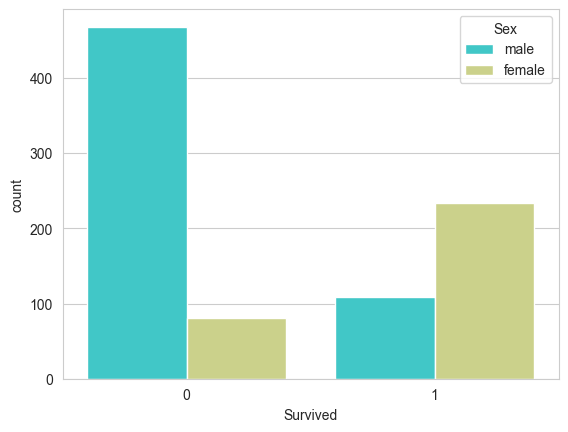

In [65]:
# Checking how many people survired are male or female.
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='rainbow',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

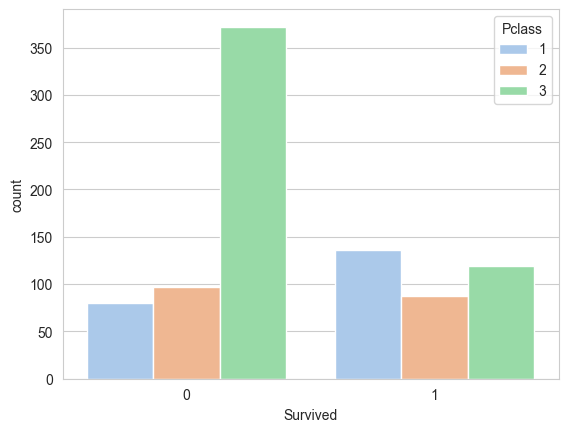

In [66]:
# Check the survival rate of different classes in the titanic.
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='pastel')

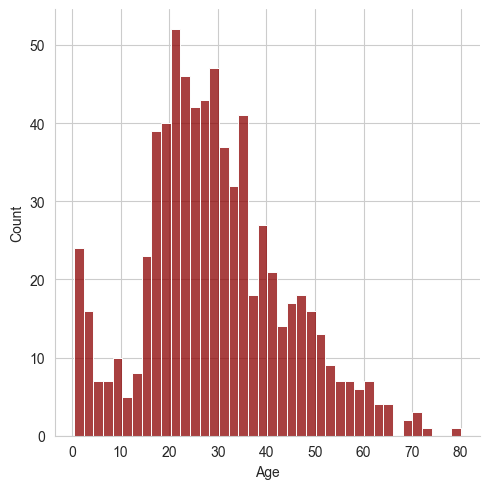

In [67]:
# Age distribution of people those who are present in th ship.
sns.displot(train['Age'].dropna(),kde=False,color='darkred', bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

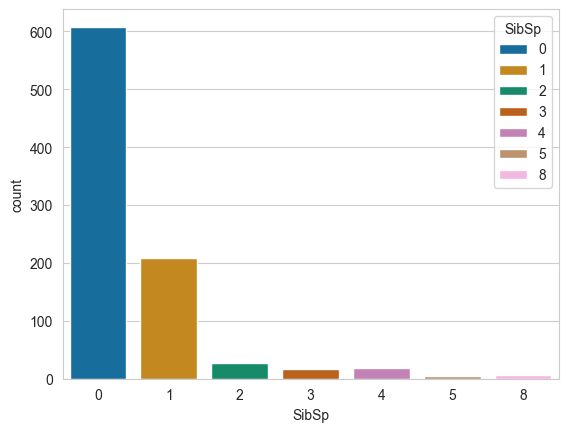

In [68]:
sns.countplot(x='SibSp', data=train, palette='colorblind', hue='SibSp')

<Axes: >

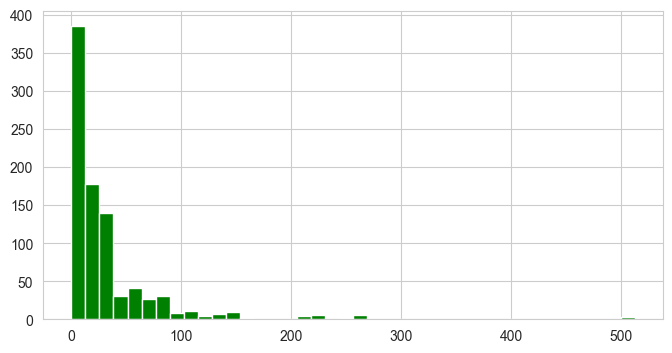

In [69]:
train['Fare'].hist(color='green', bins=40,figsize=(8,4))

# Data Cleaning 
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all passengers(imputation). However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

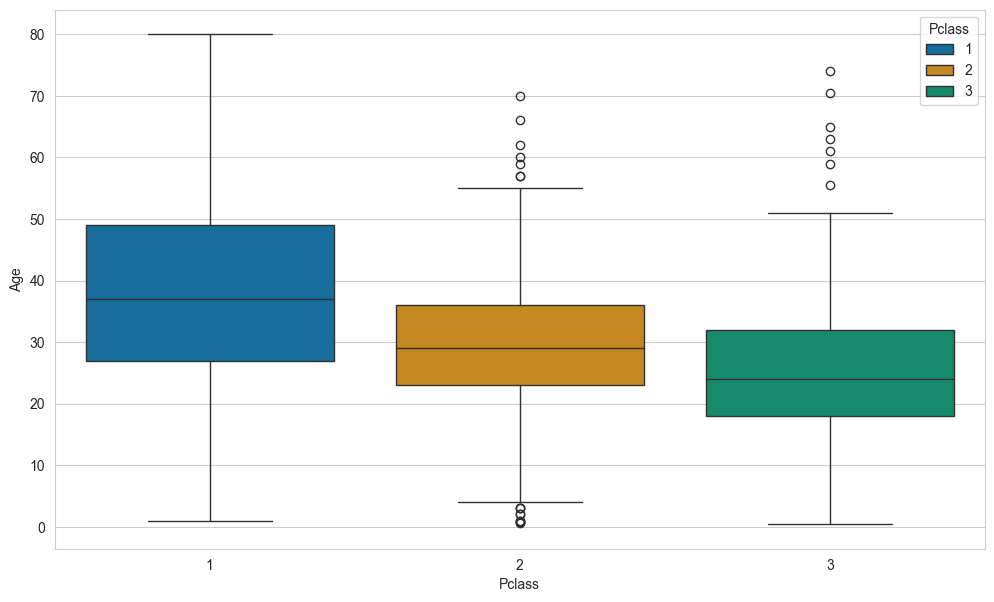

In [70]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='colorblind', hue='Pclass')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We''ll use these
average age values to impute based on Pclass for Age.

In [71]:
def impute_age(cols):
    Age=cols.iloc[0]
    Pclass=cols.iloc[1]

    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
            
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function!

In [72]:
# Filling the null values in age based on the impute_age function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heatmap again

<Axes: >

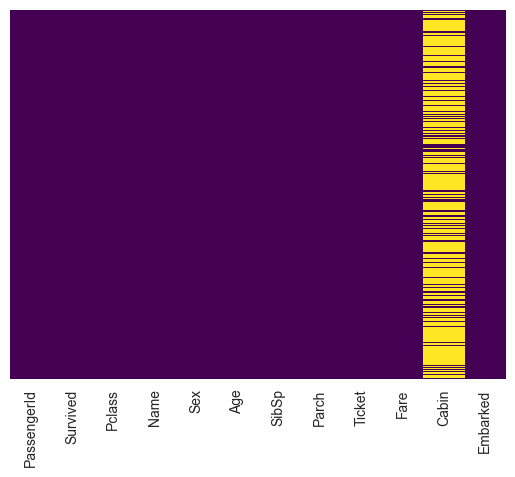

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the cabin column and row in embarked that is nan

In [74]:
# Since the cabin is having lots of null value so we are going to drop that column.
train.drop('Cabin', axis=1, inplace=True)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [76]:
# train.dropna(inplace=True)

# Converting categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [78]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [79]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [80]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [82]:
train=pd.concat([train,sex,embark],axis=1)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


 Hence our data is ready for our model

# Building Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training.)

# Train Test Split

In [84]:
x=train.drop('Survived',axis=1).head()

In [85]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [86]:
y=train['Survived'].head()

In [87]:
y

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=101)

In [90]:
print(x.shape,x_train.shape,x_test.shape)

(5, 9) (3, 9) (2, 9)


# Training and Prediction

In [91]:
from sklearn.linear_model import LogisticRegression

In [98]:
model= LogisticRegression()


In [99]:
model.fit(x_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1